# Sports Marketing Contest

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
# import linear regression classifier
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from scipy.spatial import distance
from scipy.cluster import hierarchy

# needed for LDA algorithm for missing values
from sklearn.preprocessing import Imputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier

#t-testing
from scipy import stats

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Import Modified Final Calibration Set With No Null's

In [2]:
calibrationmod=pd.read_csv("datasets/calibration/phase2calibrationfinal.csv")
calibrationmod.head()

,FAKEID,Y2defect,Utilrate,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,580V74KT,0,0.6,15,8,1,94,4,0,1,0,77,203
1,298S54OK,1,0.4,15,3,1,63,3,0,0,0,53,68
2,268D25AO,1,0.4,15,11,1,67,2,0,1,0,50,38
3,312Q12WV,1,0.6,15,4,0,62,4,1,1,0,60,68
4,420R23VB,0,0.2,15,5,0,89,4,1,1,0,65,194


In [4]:
calibrationmod.isnull().sum()

FAKEID      0
Y2defect    0
Utilrate    0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
GNDR        0
OWNHOME     0
SPORT       0
PCTMARR     0
HOMEVAL     0
dtype: int64

#### Understand the Effect of Utilization Rate on Defect Better

In [6]:
# pivot count of defect among different Utilrates
calibrationmod.groupby(['Y2defect','Utilrate']).size().sort_values(ascending=False)

Y2defect  Utilrate
1         0.4         1686
          0.2         1561
0         0.4         1535
          0.6         1316
          0.2          994
1         0.6          869
0         0.8          633
1         0.8          406
0         1.0          130
1         1.0           86
dtype: int64

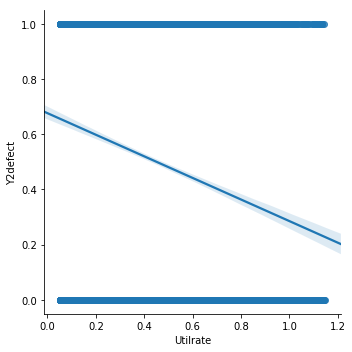

In [10]:
#linear regression between x values and Y2defect
sns.lmplot("Utilrate", "Y2defect", calibrationmod, x_jitter=.15)

#### Correlation & Heatmap for DF Calibration

In [13]:
calibrationmod[['Y2defect','Utilrate']].corr()

,Y2defect,Utilrate
Y2defect,1.00000,-0.16472
Utilrate,-0.16472,1.00000


As utilization of game passes decreases the likelyhood of someone defecting increases

# Classification Model Analysis Using Cross Validation (Rank)

#### (1) Use of the Random Forest 200 trees (Best) on DF calibrationmod Drop Y2defect, FAKEID, AGE

In [15]:
# declare X variables and y variable
y = calibrationmod['Y2defect']
X = calibrationmod.drop(['Y2defect','FAKEID', 'AGE'], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.

0.532730560579
--------------------------------------------------------
[[724 639]
 [653 749]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.53      0.53      0.53      1363
          1       0.54      0.53      0.54      1402

avg / total       0.53      0.53      0.53      2765

--------------------------------------------------------
0.532709011233


In [21]:
clf4 = RandomForestClassifier(n_estimators=200)    #building 200 decision trees
clf4=clf4.fit(X, y)
clf4.score(X,y)

0.99934895833333337

In [22]:
# generate evaluation metrics
print metrics.accuracy_score(y, clf4.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf4.predict(X))
print metrics.classification_report(y, clf4.predict(X))
print metrics.roc_auc_score(y, clf4.predict(X))

0.999348958333
[[4603    5]
 [   1 4607]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4608
          1       1.00      1.00      1.00      4608

avg / total       1.00      1.00      1.00      9216

0.999348958333


Not quite as good as phase one where utilization rate was used

In [57]:
# dataframe to show list of importance in variables
pd.DataFrame({'feature':X.columns, 'importance':clf4.feature_importances_})

,feature,importance
0,Utilrate,0.065308
1,Y1price,0.040236
2,YEARS,0.136795
3,BACKER,0.031566
4,INCOME,0.100749
5,GNDR,0.034409
6,SPORT,0.021132
7,PCTMARR,0.256046
8,HOMEVAL,0.313759


#### (2) Use of the Random Forest 200 trees (Best) on DF calibrationmod Drop Y2defect, FAKEID, AGE, SPORT

In [42]:
# declare X variables and y variable
y = calibrationmod['Y2defect']
X = calibrationmod.drop(['Y2defect','FAKEID', 'AGE','SPORT'], axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt2 = DecisionTreeClassifier()
dt2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
#Model evaluation
print metrics.accuracy_score(y_test, dt2.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt2.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt2.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt2.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.

0.532368896926
--------------------------------------------------------
[[716 647]
 [646 756]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.53      0.53      0.53      1363
          1       0.54      0.54      0.54      1402

avg / total       0.53      0.53      0.53      2765

--------------------------------------------------------
0.532270742038


In [45]:
clf5 = RandomForestClassifier(n_estimators=200)    #building 200 decision trees
clf5=clf5.fit(X, y)
clf5.score(X,y)

0.99924045138888884

#### (4) Use of the Random Forest 200 trees (Best) on DF calibrationmod Drop Y2defect, FAKEID, AGE, SPORT,  OWNHOME

In [49]:
# declare X variables and y variable
y = calibrationmod['Y2defect']
X = calibrationmod.drop(['Y2defect','FAKEID', 'AGE','SPORT','OWNHOME'], axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt3 = DecisionTreeClassifier()
dt3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
#Model evaluation
print metrics.accuracy_score(y_test, dt3.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt3.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt3.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt3.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.

0.542133815552
--------------------------------------------------------
[[717 646]
 [620 782]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.54      0.53      0.53      1363
          1       0.55      0.56      0.55      1402

avg / total       0.54      0.54      0.54      2765

--------------------------------------------------------
0.541910047799


In [52]:
clf6 = RandomForestClassifier(n_estimators=200)    #building 200 decision trees
clf6=clf6.fit(X, y)
clf6.score(X,y)

0.99869791666666663

#### (3) Use of the Random Forest 200 trees (Best) on DF calibrationmod Drop Y2defect, FAKEID, AGE, OWNHOME

In [53]:
# declare X variables and y variable
y = calibrationmod['Y2defect']
X = calibrationmod.drop(['Y2defect','FAKEID', 'AGE','OWNHOME'], axis=1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt4 = DecisionTreeClassifier()
dt4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
#Model evaluation
print metrics.accuracy_score(y_test, dt4.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt4.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt4.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt4.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.

0.537793851718
--------------------------------------------------------
[[717 646]
 [632 770]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.53      0.53      0.53      1363
          1       0.54      0.55      0.55      1402

avg / total       0.54      0.54      0.54      2765

--------------------------------------------------------
0.537630447228


In [56]:
clf7 = RandomForestClassifier(n_estimators=200)    #building 200 decision trees
clf7=clf7.fit(X, y)
clf7.score(X,y)

0.99880642361111116

#### (6) Use of the Random Forest 200 trees (Best) on DF calibrationmod Drop Y2defect, FAKEID, AGE, SPORT, GNDR

In [58]:
# declare X variables and y variable
y = calibrationmod['Y2defect']
X = calibrationmod.drop(['Y2defect','FAKEID', 'AGE','SPORT','GNDR'], axis=1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt5 = DecisionTreeClassifier()
dt5.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
#Model evaluation
print metrics.accuracy_score(y_test, dt5.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt5.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt5.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt5.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.

0.537070524412
--------------------------------------------------------
[[718 645]
 [635 767]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.53      0.53      0.53      1363
          1       0.54      0.55      0.55      1402

avg / total       0.54      0.54      0.54      2765

--------------------------------------------------------
0.536927384943


In [67]:
clf8 = RandomForestClassifier(n_estimators=200)    #building 200 decision trees
clf8=clf8.fit(X, y)
clf8.score(X,y)

0.99761284722222221

#### (7) Use of the Random Forest 200 trees (Best) on DF calibrationmod Drop Y2defect, FAKEID, AGE, OWNHOME, GNDR

In [59]:
# declare X variables and y variable
y = calibrationmod['Y2defect']
X = calibrationmod.drop(['Y2defect','FAKEID', 'AGE','OWNHOME','GNDR'], axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt6 = DecisionTreeClassifier()
dt6.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
#Model evaluation
print metrics.accuracy_score(y_test, dt6.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt6.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt6.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt6.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.

0.53164556962
--------------------------------------------------------
[[718 645]
 [650 752]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.52      0.53      0.53      1363
          1       0.54      0.54      0.54      1402

avg / total       0.53      0.53      0.53      2765

--------------------------------------------------------
0.53157788423


In [68]:
clf9 = RandomForestClassifier(n_estimators=200)    #building 200 decision trees
clf9=clf9.fit(X, y)
clf9.score(X,y)

0.99761284722222221

#### (5) Use of the Random Forest 200 trees (Best) on DF calibrationmod Drop Y2defect, FAKEID, AGE, OWNHOME, SPORT, GNDR

In [60]:
# declare X variables and y variable
y = calibrationmod['Y2defect']
X = calibrationmod.drop(['Y2defect','FAKEID', 'AGE','OWNHOME','SPORT','GNDR'], axis=1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt7 = DecisionTreeClassifier()
dt7.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
#Model evaluation
print metrics.accuracy_score(y_test, dt7.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt7.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt7.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt7.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.

0.541048824593
--------------------------------------------------------
[[732 631]
 [638 764]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.53      0.54      0.54      1363
          1       0.55      0.54      0.55      1402

avg / total       0.54      0.54      0.54      2765

--------------------------------------------------------
0.540993214808


In [69]:
clf10 = RandomForestClassifier(n_estimators=200)    #building 200 decision trees
clf10=clf10.fit(X, y)
clf10.score(X,y)

0.99761284722222221